In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydae import ssa
import temp

model = temp.model()

v_ref_1 = 1.0
model.ini({'p_m_1':0.5,'v_ref_1':v_ref_1, 'T_b_1':10.0},'xy_0.json')
ssa.A_eval(model)
model.run(1.0,{})
model.run(17.0,{'v_ref_1':1.05})
model.post()


In [2]:
ssa.damp_report(model)

,Real,Imag,Freq.,Damp
Mode 1,-1.000000e+02,0.000000,0.000000,1.000000
Mode 2,-1.000000e-02,0.000000,0.000000,1.000000
Mode 3,-8.241546e-01,7.966004,1.267829,0.102910
Mode 4,-8.241546e-01,-7.966004,1.267829,0.102910
Mode 5,-6.261920e+00,0.000000,0.000000,1.000000
Mode 6,-2.139222e-01,0.335884,0.053458,0.537194
Mode 7,-2.139222e-01,-0.335884,0.053458,0.537194
Mode 8,-8.907424e-07,0.000000,0.000000,1.000000
Mode 9,1.000000e+00,0.000000,0.000000,-1.000000


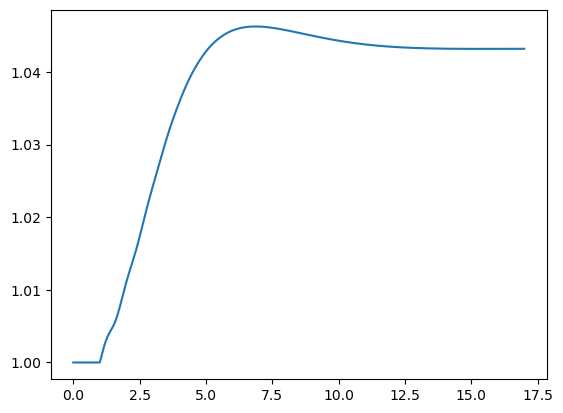

In [3]:
fig,axes = plt.subplots()

axes.plot(model.Time,model.get_values('V_1'))
fig.savefig('sexs_step.svg')

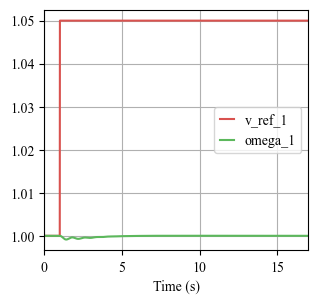

In [4]:
layout = [[['v_ref_1'],['V_1','V_2']],
          [['omega_1'],['theta_1']]]

layout = [['v_ref_1'],['V_1','V_2']]

# layout = [[['v_ref_1'],
#            ['omega_1']]]

layout = ['v_ref_1','omega_1']

from pydae.plot_tools import plot

plot(model,layout,'plot.svg');



In [5]:
from pydae.plot_tools import set_style